## MovieLens 데이터 분석


In [4]:
import pandas as pd
import numpy as np

import os

### 데이터 불러오기

In [5]:
data_path = './data/ml-latest-small/'

print(os.listdir(data_path))

['links.csv', 'tags.csv', 'ratings.csv', 'README.txt', 'movies.csv']


In [14]:
ratings_df = pd.read_csv(data_path + 'ratings.csv', encoding='utf-8')
tags_df = pd.read_csv(os.path.join(data_path + 'tags.csv'), encoding = 'utf-8')
movies_df = pd.read_csv(os.path.join(data_path + 'movies.csv'), encoding ='utf-8', index_col='movieId')

display(ratings_df.head())
display(tags_df.head())
display(movies_df.head())

print(f'ratings_df Shape : {ratings_df.shape} / tags_df Shape : {tags_df.shape} / movies_df Shape : {movies_df.shape}' )

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


ratings_df Shape : (100836, 4) / tags_df Shape : (3683, 4) / movies_df Shape : (9742, 2)


### 평점 데이터의 기초 통계량

In [30]:
## 사용자 수
users_numbers = len(np.unique(ratings_df['userId']))

## 영화 수
movies_numbers = len(np.unique(ratings_df['movieId']))


print('사용자 수 : ', users_numbers)
print('영화 수 : ', movies_numbers)
print('평점의 평균 : ', ratings_df['rating'].mean())
print('평점 표준편차 : ', ratings_df['rating'].std())

사용자 수 :  610
영화 수 :  9724
평점의 평균 :  3.501556983616962
평점 표준편차 :  1.0425292390605359


In [32]:
ratings_df.info() ## Null 개수 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [37]:
ratings_df.describe()['rating']

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

array([[<AxesSubplot:title={'center':'userId'}>,
        <AxesSubplot:title={'center':'movieId'}>],
       [<AxesSubplot:title={'center':'rating'}>, <AxesSubplot:>]],
      dtype=object)

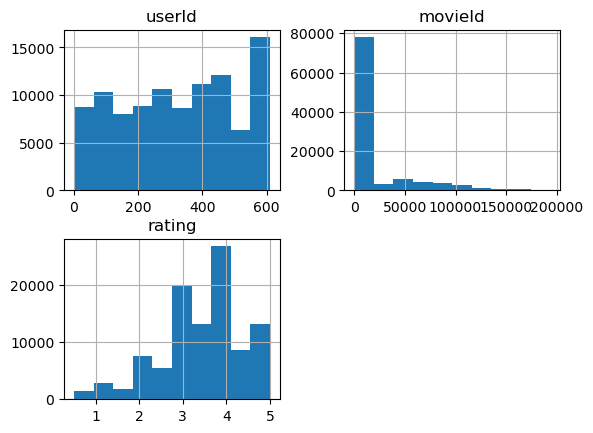

In [38]:
ratings_df[['userId', 'movieId', 'rating']].hist()

### pandas - groubpy

In [63]:
ratings_df.groupby(['userId', 'rating']).size()

userId  rating
1       1.0         1
        2.0         5
        3.0        26
        4.0        76
        5.0       124
                 ... 
610     3.0       230
        3.5       315
        4.0       286
        4.5       148
        5.0       180
Length: 3976, dtype: int64

In [59]:
## 사용자마다 rating의 평균

ratings_df.groupby('userId').mean()

,movieId,rating,timestamp
userId,,,
1,1854.603448,4.366379,9.649856e+08
2,70350.275862,3.948276,1.445715e+09
3,7058.384615,2.435897,1.306464e+09
4,1982.129630,3.555556,9.658643e+08
5,343.840909,3.636364,8.474351e+08
...,...,...,...
606,9692.197309,3.657399,1.179512e+09
607,1860.636364,3.786096,9.647841e+08
608,4502.605295,3.134176,1.122668e+09


In [65]:
userId_rating_df = pd.DataFrame({'count' : gum})
userId_rating_df.reset_index(inplace=True)
userId_rating_df.head(10)


,userId,rating,count
0,1,1.0,1
1,1,2.0,5
2,1,3.0,26
3,1,4.0,76
4,1,5.0,124
5,2,2.0,1
6,2,2.5,1
7,2,3.0,4
8,2,3.5,4
9,2,4.0,9


In [70]:
user_info = ratings_df.groupby(['userId'])['movieId'].count()

print(user_info.head())
display(user_info.describe())

## 한 사용자가 최고 2698개 평점 남김
## 평균 165개의 영화 평점을 남김
## 특정 유저들이 너무 많은 영화를 남김!! (편향있음)

userId
1    232
2     29
3     39
4    216
5     44
Name: movieId, dtype: int64


count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: movieId, dtype: float64

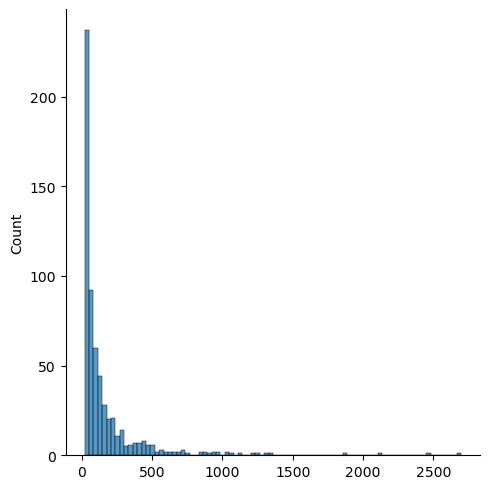

In [71]:
import seaborn as sns

sns.displot(user_info.values)

- 사용자가 평균적으로 준 평점과 평점을 준 영화의 수

In [74]:
user_stats_df = pd.DataFrame({
    'movie_count' : ratings_df.groupby(['userId'])['movieId'].count(),
    'rating_mean' : ratings_df.groupby(['userId'])['rating'].mean(),
    'rating_std' : ratings_df.groupby(['userId'])['rating'].std(),
})

display(user_stats_df.head())
print(user_stats_df.shape)

,movie_count,rating_mean,rating_std
userId,,,
1,232,4.366379,0.800048
2,29,3.948276,0.805615
3,39,2.435897,2.090642
4,216,3.555556,1.314204
5,44,3.636364,0.990441


(610, 3)


- 평점을 준 사용자가 많은 영화

In [77]:
movie_stats_df= pd.DataFrame({
        'num_users' : ratings_df.groupby(['movieId']).count()['userId'],
        'rating_mean' : ratings_df.groupby(['movieId']).mean()['rating'],
        'rating_std' : ratings_df.groupby('movieId').std()['rating']
    })

display(movie_stats_df.head())
print(movie_stats_df.shape)

,num_users,rating_mean,rating_std
movieId,,,
1,215,3.920930,0.834859
2,110,3.431818,0.881713
3,52,3.259615,1.054823
4,7,2.357143,0.852168
5,49,3.071429,0.907148


(9724, 3)


In [80]:
movie_stats_df.sort_values(by='num_users', ascending=False)

,num_users,rating_mean,rating_std
movieId,,,
356,329,4.164134,0.831244
318,317,4.429022,0.713019
296,307,4.197068,0.951997
593,279,4.161290,0.853983
2571,278,4.192446,0.975243
...,...,...,...
4093,1,1.500000,NaN
4089,1,2.000000,NaN
58351,1,4.000000,NaN


<AxesSubplot:>

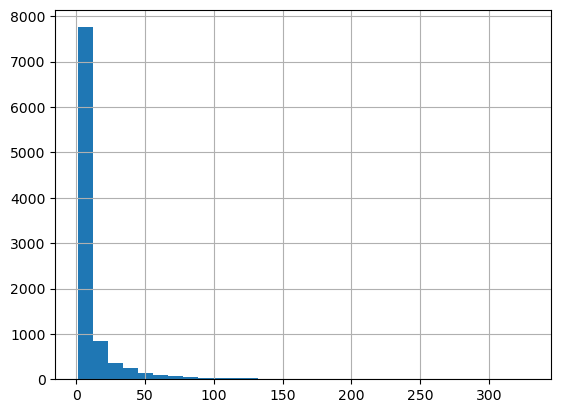

In [96]:
movie_stats_df['num_users'].hist(bins=30)

In [98]:
# 시청한 사용자가 1인 데이터가 3446개
display(movie_stats_df.loc[movie_stats_df['num_users'] == 1, :])

# 전체 영화수 - 시청자 수 1인 영화
print(movies_df.shape[0]- movie_stats_df.loc[movie_stats_df['num_users'] == 1, :].shape[0]) 

,num_users,rating_mean,rating_std
movieId,,,
49,1,3.0,NaN
55,1,4.0,NaN
77,1,4.0,NaN
83,1,3.0,NaN
96,1,3.5,NaN
...,...,...,...
193581,1,4.0,NaN
193583,1,3.5,NaN
193585,1,3.5,NaN


6296


In [99]:
movie_stats_df.loc[movie_stats_df['num_users'] < 10, :]

,num_users,rating_mean,rating_std
movieId,,,
4,7,2.357143,0.852168
8,8,2.875000,1.125992
13,8,3.125000,0.640870
27,9,3.333333,1.198958
30,3,3.000000,1.732051
...,...,...,...
193581,1,4.000000,NaN
193583,1,3.500000,NaN
193585,1,3.500000,NaN


## 평점이 높은 영화 장르

In [101]:
movies_df.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [102]:
# (평점을 많이 받은)시청자가 많이 평점을 남긴 영화

ratings_count_df = ratings_df.groupby('movieId')['userId'].count()
ratings_count_df.head()

movieId
1    215
2    110
3     52
4      7
5     49
Name: userId, dtype: int64

In [110]:
temp = pd.DataFrame({
    'ratings_count' : ratings_count_df
})

temp['title'] = temp.apply(lambda x: movies_df['title'].loc[x.index])
temp.sort_values('ratings_count', ascending=False)

,ratings_count,title
movieId,,
356,329,Forrest Gump (1994)
318,317,"Shawshank Redemption, The (1994)"
296,307,Pulp Fiction (1994)
593,279,"Silence of the Lambs, The (1991)"
2571,278,"Matrix, The (1999)"
...,...,...
4093,1,Cop (1988)
4089,1,Born in East L.A. (1987)
58351,1,City of Men (Cidade dos Homens) (2007)


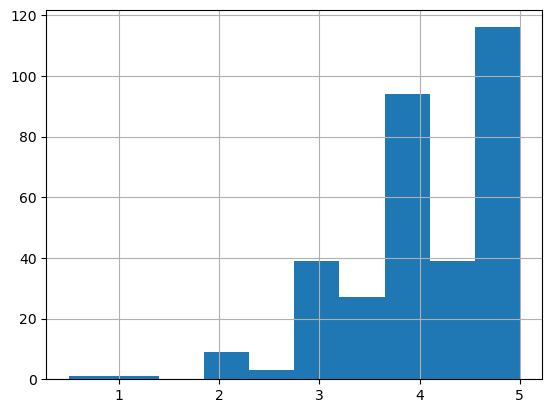

In [115]:
def movie_ratings(num):
    ratings_df.loc[ratings_df['movieId'] == num]['rating'].hist()

movie_ratings(356)

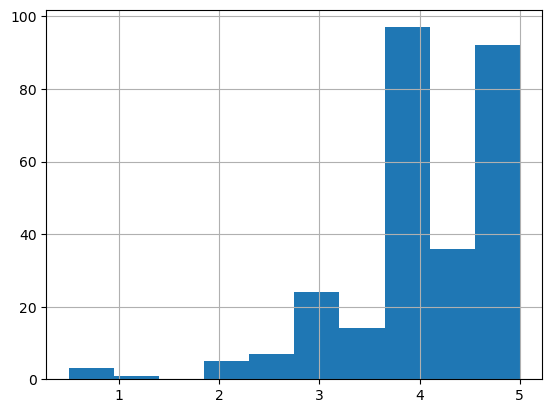

In [116]:
movie_ratings(593)

### 특정 사용자가 주는에서 평점을 낮게 준 사용자는??

In [117]:
ratings_df[(ratings_df.movieId == 356) & (ratings_df.rating < 2)]

,userId,movieId,rating,timestamp
12274,76,356,1.0,1439165536
13553,89,356,0.5,1520408275


In [119]:
ratings_df[(ratings_df.movieId == 593) & (ratings_df.rating < 2)]

,userId,movieId,rating,timestamp
17280,111,593,0.5,1516140707
54912,365,593,0.5,1488332713
72403,467,593,1.0,919672054
92602,598,593,0.5,1430616982


<AxesSubplot:>

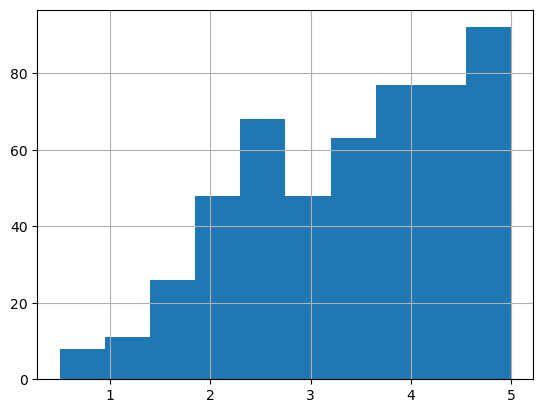

In [122]:
## 356 영화를 평점 2점 이하준 89번 사용자가 준 rating 시각화

ratings_df[(ratings_df.userId == 89)]['rating'].hist()